In [8]:
import mne
import pywt
import scaleogram as scg
import pandas as pd
import numpy as np
import scipy
from scipy import signal
import matplotlib.pyplot as plt 
from edf_file_processing import create_raw_object, visualize_data, find_all_paths

In [9]:
# ./train/02_tcp_le/014/00001479/s001_2004_06_14/00001479_s001_t001.tse
rawEDF = create_raw_object("edf/train/02_tcp_le/014/00001479/s001_2004_06_14/filtered_00001479_s001_t001.edf")

Extracting EDF parameters from /home/sophia/projects/eeg_epilepsy/edf/train/02_tcp_le/014/00001479/s001_2004_06_14/filtered_00001479_s001_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [10]:
rawEDF.info

<Info | 7 non-empty values
 bads: []
 ch_names: EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE, EEG C3-LE, EEG ...
 chs: 25 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2020-11-20 07:43:35 UTC
 nchan: 25
 projs: []
 sfreq: 250.0 Hz
>

In [11]:
start, stop = rawEDF.time_as_index([100, 102])
# print(start, stop)
data, times = rawEDF[:, start:stop]

# print(data.shape)
# print(times.shape)
print(times)
s, st = rawEDF.time_as_index([952, 954])
# print(s, st)
d, t = rawEDF[:, s:st]

[100.    100.004 100.008 100.012 100.016 100.02  100.024 100.028 100.032
 100.036 100.04  100.044 100.048 100.052 100.056 100.06  100.064 100.068
 100.072 100.076 100.08  100.084 100.088 100.092 100.096 100.1   100.104
 100.108 100.112 100.116 100.12  100.124 100.128 100.132 100.136 100.14
 100.144 100.148 100.152 100.156 100.16  100.164 100.168 100.172 100.176
 100.18  100.184 100.188 100.192 100.196 100.2   100.204 100.208 100.212
 100.216 100.22  100.224 100.228 100.232 100.236 100.24  100.244 100.248
 100.252 100.256 100.26  100.264 100.268 100.272 100.276 100.28  100.284
 100.288 100.292 100.296 100.3   100.304 100.308 100.312 100.316 100.32
 100.324 100.328 100.332 100.336 100.34  100.344 100.348 100.352 100.356
 100.36  100.364 100.368 100.372 100.376 100.38  100.384 100.388 100.392
 100.396 100.4   100.404 100.408 100.412 100.416 100.42  100.424 100.428
 100.432 100.436 100.44  100.444 100.448 100.452 100.456 100.46  100.464
 100.468 100.472 100.476 100.48  100.484 100.488 100.

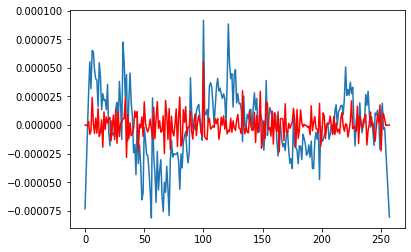

In [12]:
(cA1, cD1) = pywt.dwt(data[1], 'sym9', 'smooth')
(cA11, cD11) = pywt.dwt(data[0], 'sym9', 'smooth')
plt.plot(cA1)
plt.plot(cD1, 'r')

In [17]:
def plot_wavelet(time, signal, scales, 
                 waveletname = 'cmor', 
                 cmap = plt.cm.seismic, 
                 title = 'Wavelet Transform (Power Spectrum) of signal', 
                 ylabel = 'Period (ms)', 
                 xlabel = 'Time'):
    
    dt = 1
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies
#     levels = [0.00005, 0.0001, 0.0006, 0.0009, 0.0025, 0.009, 0.08]
#               , 7.41766903e-06, 1.47899270e-05, 1.70354999e-05,  2.13359837e-05]
    contourlevels = [-42, -40, -36, -34, -32, -30, -28, -26, -24]
#     contourlevels = [-50, -40, -30, -20, -10]
#     print(contourlevels)
    
    fig, ax = plt.subplots(figsize=(12, 10))
    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)
    
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], -1)
    
    cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
#     print(cbar_ax)
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")
    plt.show()

/home/sophia/anaconda3/lib/python3.8/site-packages/pywt/_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


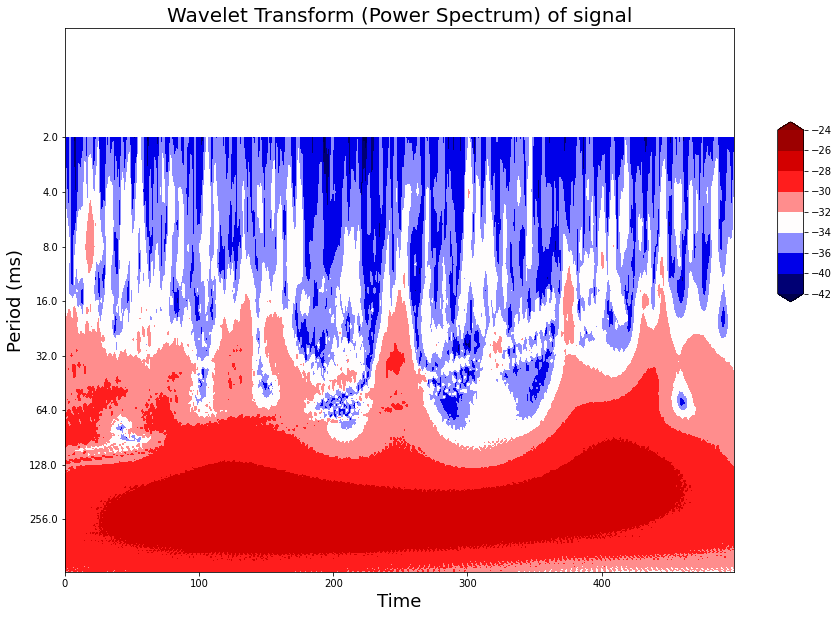

In [32]:
sig = data[0]
freq = 250
sampling_period = 2
# print(len(signal))
scales = np.arange(1, 250)
# print(len(scales))
time = np.arange(0,500)
# print(len(time))
# for sig_ch in sig: 
plot_wavelet(time, sig, scales)

In [23]:
print(len(sig))

500


In [24]:
[coefficients, frequencies] = pywt.cwt(sig, scales, 'cmor1-1.5', 1)
print(coefficients.shape)
# print(coefficients[1])
print(frequencies.shape)

(249, 500)
(249,)


/home/sophia/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


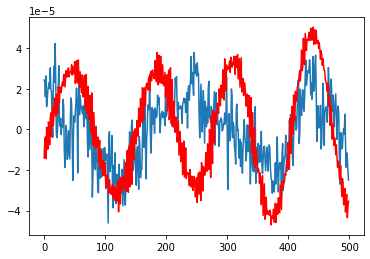

In [31]:
plt.plot(sig)
plt.plot(coefficients[200], 'r')
# plt.plot(frequencies)

(250, 500)


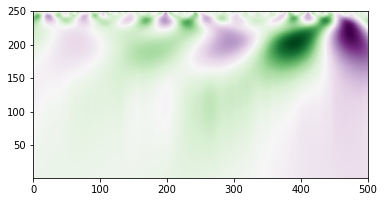

In [219]:
swtmatr = signal.cwt(sig, signal.ricker, np.arange(1, 251))
print(swtmatr.shape)
plt.imshow(swtmatr, extent=[0, 500, 1, 250], cmap='PRGn')
plt.show()

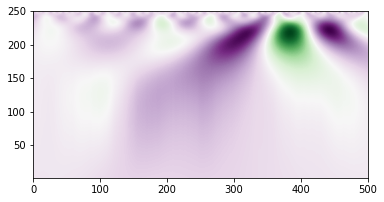

In [69]:
swtmatr = signal.cwt(d[0], signal.ricker, np.arange(1, 250))
plt.imshow(swtmatr, extent=[0, 500, 1, 250], cmap='PRGn')
plt.show()

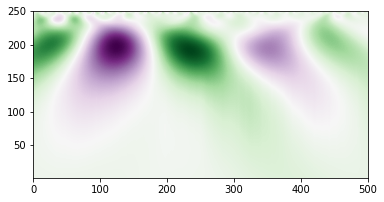

In [66]:
swtmatr = signal.cwt(data[1][:500], signal.ricker, np.arange(1, 250))
plt.imshow(swtmatr, extent=[0, 500, 1, 250], cmap='PRGn')
plt.show()

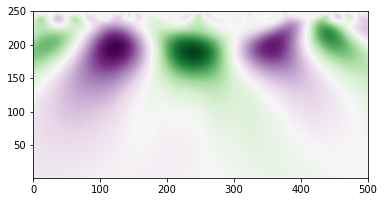

In [67]:
swtmatr = signal.cwt(data[0][:500], signal.ricker, np.arange(1, 250))
plt.imshow(swtmatr, extent=[0, 500, 1, 250], cmap='PRGn')
plt.show()

# OBSPY


In [87]:
import obspy
from obspy.imaging.cm import obspy_sequential
from obspy.signal.tf_misfit import cwt